## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

**Загрузил дата-сет на гугл диск, чтобы каждый раз не загружать его в ноутбук, и с диска уже загружать его.**

**К тому же, это намного быстрее.**


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
taxi_data = pd.read_csv("drive/My Drive/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.


❓**Самая ранняя дата: 2016-01-01 00:00:17**

❓**Самая поздняя дата: 2016-06-30 23:59:39**

In [ ]:
# Преобразование столбца "pickup_datetime" в формат "to_datetime" с указанным форматом format='%Y-%m-%d %H:%M:%S'
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# проверка результата
print(taxi_data['pickup_datetime'][0])

2016-03-14 17:24:55


In [ ]:
# Нахождение самой ранней и самой поздней даты
earliest_date = taxi_data['pickup_datetime'].min()
latest_date = taxi_data['pickup_datetime'].max()

# Вывод результатов
print("Самая ранняя дата:", earliest_date)
print("Самая поздняя дата:", latest_date)

Самая ранняя дата: 2016-01-01 00:00:17
Самая поздняя дата: 2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

❓**0 пропусков**

In [ ]:
print(taxi_data.isnull().sum().sum())
print(taxi_data.isna().sum().sum())

0
0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных? **2**

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


❓**Тут легче посмотреть вывод ячейки, так как информации много**


In [ ]:
# можно было просто васпользоваться функцией describe(), но решил
# вспомнить отдельные их аналоги

# Решение пункта а)
print(f"Всего уникальных таксопарков: {taxi_data.vendor_id.unique()}")

# Решение пункта б)
print(f"Максимальное количество пассажиров: {taxi_data.passenger_count.max()}")

# Решение пункта в)
print(f"Средняя длительность поездки: {round(taxi_data.trip_duration.mean())} секунд")
print(f"Медианная длительность поездки: {round(taxi_data.trip_duration.median())} секунд")

# Решение пункта г)
print(f"Минимальная длительность поездки: {round(taxi_data.trip_duration.min())} секунд")
print(f"Максимальная длительность поездки: {round(taxi_data.trip_duration.max())} секунд")

Всего уникальных таксопарков: [2 1]
Максимальное количество пассажиров: 9
Средняя длительность поездки: 959 секунд
Медианная длительность поездки: 662 секунд
Минимальная длительность поездки: 1 секунд
Максимальная длительность поездки: 3526282 секунд


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

❓**Число поездок в субботу: 220868**

❓**Число поездок в среднем: 8015**

**ВАЖНО!**

В задании выше в третьем пункте просят создать столбце с **наименованием дня недели**, в то время как на платформе с **день недели**

Я выбрал второе, так как для обработки будет легче варировать числами, а не строковыми данными

*Понедельнику соответствует 0*

Но привожу пример, как создать столбце со строковыми данными:

`taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.day_name()`

In [ ]:
def add_datetime_features(taxi_data):
    # Создание столбца "pickup_date" с датой включения счетчика/началом поездки (без времени)
    taxi_data['pickup_date'] = taxi_data['pickup_datetime'].dt.date

    # Создание столбца "pickup_hour" с часом включения счетчика
    taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour

    # Создание столбца "pickup_day_of_week" с днем недели
    taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.dayofweek

    return taxi_data

# Пример использования функции
taxi_data = add_datetime_features(taxi_data)

# Вывод значений первой строки для добавленных столбцов
print(taxi_data['pickup_date'][0], taxi_data['pickup_hour'][0], taxi_data['pickup_day_of_week'][0])


2016-03-14 17 0


In [ ]:
# Число поездок в субботу (пятый день, неделя начинается с 0)
print(f"Число поездок в субботу: {taxi_data[taxi_data['pickup_day_of_week'] == 5].shape[0]}")

# Сколько поездок в среднем совершается в день?
print(f"Число поездок в среднем: {round(taxi_data.groupby('pickup_date').size().mean())}")

Число поездок в субботу: 220868
Число поездок в среднем: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.

❓**Медианная длительность поездки в праздники: 585**

In [ ]:
holiday_data = pd.read_csv("drive/My Drive/holiday_data.csv", sep=';')
holiday_data['date'] = pd.to_datetime(holiday_data['date'])
holiday_data['date'] = holiday_data['date'].dt.date

In [ ]:
def add_holiday_features(taxi, holidays):

    # Объединение таблиц по столбцу "pickup_date"
    merged_data = pd.merge(taxi, holidays, left_on='pickup_date', right_on='date', how='left')
    
    # Создание столбца "pickup_holiday" с бинарным признаком праздничного дня
    merged_data['pickup_holiday'] = merged_data['holiday'].notnull().astype(int)
    
    # Удаление ненужных столбцов
    merged_data = merged_data.drop(['date', 'holiday', 'day'], axis=1)
    
    return merged_data

# Вызов функции и добавление столбца "pickup_holiday" в датафрейм с данными о поездках
taxi_data = add_holiday_features(taxi_data, holiday_data)


In [ ]:
print(f"Медианная длительность поездки в праздники: {round(taxi_data.groupby('pickup_holiday').trip_duration .median())} секунд")

Медианная длительность поездки в праздники: pickup_holiday
0    665.0
1    585.0
Name: trip_duration, dtype: float64 секунд


In [ ]:
taxi_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?


❓**а) 372**

❓**б) 1**

In [ ]:
osrm_data = pd.read_csv('drive/My Drive/osrm_data_train.csv')
osrm_data.head(3)
# здесь раньше была надпись "# ваш код здесь", но я считаю,
# что загрузка данных и их обработка, функция
# не должны быть в одной ячейки, так как при проверке функции,
# мы каждый раз запускаем загрузку данных

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."


In [ ]:
def add_osrm_features(left_table, right_table, list_col):
  # тут новые имена таблиц, в отличии от предыдуущий функции
  # так как из-за старых имён я долго не мог понять проблему

  # Выделение столбцов из right_table
  right_table_subset = right_table[list_col]

  # Объединение left_table и right_table_subset по столбцу "id" с типом объединения "left"
  merged_data = pd.merge(left_table, right_table_subset, on='id', how='left')

  return merged_data

# лист с нужными нам столбцами, и id, по которыму будем мёржить
selected_columns = ['id', 'total_distance', 'total_travel_time', 'number_of_steps']


taxi_data = add_osrm_features(taxi_data, osrm_data, selected_columns)

# вывожи фрейм taxi_data, чтобы проверить, что в нём существуют данные столбцы
print(taxi_data.loc[:, selected_columns])

                id  total_distance  total_travel_time  number_of_steps
0        id2875421          2009.1              164.9              5.0
1        id2377394          2513.2              332.0              6.0
2        id3858529         11060.8              767.6             16.0
3        id3504673          1779.4              235.8              4.0
4        id2181028          1614.9              140.1              5.0
...            ...             ...                ...              ...
1458639  id2376096          2234.6              311.7              8.0
1458640  id1049543          7638.0              589.6             11.0
1458641  id2304944          9871.5              642.9             10.0
1458642  id2714485          1628.3              161.6              7.0
1458643  id1209952          1134.2               90.7              2.0

[1458644 rows x 4 columns]


In [ ]:
# total_travel_time из ORM отвечает за время поездки
# trip_duration  из taxi_data отвечает за время поездки
# abs можно не использовать, но при точных не известных использую

taxi_median = taxi_data.trip_duration.median()
ORM_median = taxi_data.total_travel_time.median()
print(f"Медиана длительности поездки равна: {round(abs(taxi_median-ORM_median))}")

print(f"Кол-во проаусков: {taxi_data.isnull().any(axis=1).sum()}")

Медиана длительности поездки равна: 372
Кол-во проаусков: 1


*В задании не сказано, нужно ли удалять пропуск, поэтому оставил его*

***Пометка для себя: переход к шарообразности Земли)***

In [ ]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.

❓**Оно равно: 2.09**


In [ ]:
def add_geographical_features(df):
    pickup_lat = df["pickup_latitude"]
    pickup_lon = df["pickup_longitude"]
    dropoff_lat = df["dropoff_latitude"]
    dropoff_lon = df["dropoff_longitude"]
    
    df["haversine_distance"] = get_haversine_distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
    df["direction"] = get_angle_direction(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
    
    return df

In [ ]:
taxi_data = add_geographical_features(taxi_data)
taxi_data.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196


### ***Самописные функции для сохранения***

***А ЧТО ЕСЛИ*** вылетит среда? Всё запускать заново? (Или нужен бэкап)

Или когда дойдём до конечных этапов также ждать, пока все прошлые блоки отработуют?

Нет!

Или я хочу просто сохранить результаты.

Также сохранения и загрузка позволит не запускать предыдущие расчётные ячейки, а получить уже их результат в таблице.

Сохраням наш промежуточный сет на гугл диск, и с него же потом загружем данные.

Напишу функиции, так как делать это понадобится не раз.

Но важно, сохранение и загрузка бьёт обработанные типы данных. Поэтому их обработку нужно будет повторить. 

(почему имя файла без расширения? при переимновании файлов выделяется именно имя, не затрагивая его расширение, поэтому будет бысрее скопировать только имя, а расширение припасать в коде)

(из бы переместить в начало, но боюсь сломать колаб)

In [2]:
# это личные функции, поэтому напишу для них документацию
# Строки из upload_google() использоваться будут не раз
# но не всегда совместно с функциями ниже, сделаем из них тоже функцию

def upload_google():
  """
  Функция импортирует модуль drive из пакета google.colab
  Для монтирования Google Drive. 
  """

  from google.colab import drive
  drive.mount('drive')


def save_result(name_old_df, name_table):
  """
  Функция сохраняет pandas DataFrame в таблицу формата .csv.

  Параметры:
  name_old_df (pandas DataFrame): DataFrame, который  будет преобразован в таблицу.
  name_table (str): Имя таблицы без формата.

  Пример использования:
  save_result(df, 'my_data')
  """

  name_table += ".csv"
  name_old_df.to_csv(name_table, sep=',' , index=False)
  !cp {name_table} "drive/My Drive/"


def load_result(name_table):
  """
  Функция создает объект DataFrame на основе имя заданной таблицы.

  Параметры:
  name_new_df (pandas DataFrame): Объект DataFrame, который будет создан на основе таблицы.
  name_table (str): Имя таблицы для загрузки без формата.

  Возвращает:
  pandas DataFrame: Созданный объект DataFrame.

  Пример использования:
  df = load_result(df, 'my_data')
  """
  name_table += ".csv" 
  name_new_df = pd.read_csv('drive/My Drive/' + name_table)
  # Задается ненужный столбец, избавляемся от него

  return name_new_df


In [ ]:
save_result(taxi_data, '27task')

In [ ]:
taxi_data27 = load_result('27task')

Но есть проблема. После после экспорта-импорта столбеw с datetime64 превращается в гадкого утёнка object

Ещё одна функция, по восстановлению этой несправедливости!

Также понадобится пересоздать стобцы pickup_date и pickup_hour

(данные там одни и те же, и тип один тот же на первый взгляд, но видимо всё, что касается datatime, нужно обновлять)

(я не ограничился одним определённым столбцом, ведь функция должна быть гибкой)

(надеюсь то, что я тут надобовял ради оптимизации и удобности не повляет в худшую сторону моих баллов)

In [ ]:
def convert_object_to_datetime(df, columns):
    """
    Преобразует указанные объекты столбцы в datetime.

    Параметры:
    df (pandas DataFrame): Исходный DataFrame.
    columns (list): Список столбцов, которые требуется преобразовать.

    Возвращает:
    pandas DataFrame: DataFrame с преобразованными столбцами.

    Пример использования:
    df = convert_columns_to_datetime(df, ['column1', 'column2', 'column3'])
    """

    for column in columns:
        df[column] = pd.to_datetime(df[column], format='%Y-%m-%d %H:%M:%S')

    return df

def convert_object_to_single_day(df, from_col, columns):
    for column in columns:
        df[column] = df[from_col].dt.date

    return df

def convert_object_to_single_hour(df, from_col, columns):
    for column in columns:
      df[column] = df[from_col].dt.hour

    return df

In [ ]:
taxi_data27 = convert_object_to_datetime(taxi_data27, ['pickup_datetime'])

taxi_data27 = convert_object_to_single_day(taxi_data27, 'pickup_datetime', ['pickup_date'])

taxi_data27 = convert_object_to_single_hour(taxi_data27, 'pickup_datetime', ['pickup_hour'])


In [ ]:
# Посмотрел на старых и новых столбцах различия, их нет
# (легче посмотреть через info, там всё 1 в 1, но занимает много места)
print((taxi_data27['trip_duration'] == taxi_data['trip_duration']).all(), end=" ")
print((taxi_data27['pickup_day_of_week'] == taxi_data['pickup_day_of_week']).all(), end=" ")

True True 

In [ ]:
print(f"Медианное расстояние Хаверсина поездок (в киллометрах): {round(taxi_data.haversine_distance.median(), 2)}")

Медианное расстояние Хаверсина поездок (в киллометрах): 2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?

❓**Два кластера 2**

In [ ]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data27[['pickup_latitude', 'pickup_longitude']],
                    taxi_data27[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [ ]:
# требуемая функция 
def add_cluster_features(df, hstack, name_col, model):
    coords = hstack
    df[name_col] = model.predict(coords)
    return df

Мухи отдельно, котлеты отдельно

Вызов и работа с резултьтатом в следующей ячейки

In [ ]:
coords = np.hstack((
    taxi_data27[['pickup_latitude', 'pickup_longitude']],
    taxi_data27[['dropoff_latitude', 'dropoff_longitude']]
))

taxi_data27 = add_cluster_features(taxi_data27, coords, "geo_cluster", kmeans)

print(taxi_data27["geo_cluster"].value_counts())

0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.

❓**Поездок было совершено в снежную погоду: 13126**

❓**Процентов от общего количества пропусков: 0.82%**


In [ ]:
# загружаем данные
# я не использовал самописнаю функцию, так как там есть удаление столбца (позже поправил это)

weather_data = pd.read_csv('drive/My Drive/weather_data.csv')

weather_data["time"] = pd.to_datetime(weather_data["time"], format="%Y-%m-%d %H:%M:%S")

weather_data["date"] = weather_data["time"].dt.date
weather_data["hour"] = weather_data["time"].dt.hour
weather_data.head(1)

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31,2


In [ ]:
def add_weather_features(left_df, right_df, what_merg, left_col_merg, right_col_merg):
    result = pd.merge(
        left=left_df,
        right=right_df[what_merg],
        how="left",
        left_on = left_col_merg,
        right_on = right_col_merg
    )
    return result


In [ ]:
columns = [
    "temperature",
    "visibility",
    "wind speed",
    "precip",
    "events",
    "date",
    "hour"
]

left_col_mrg = ["pickup_date", "pickup_hour"]
right_col_mrg = ["date", "hour"]

temp_df = add_weather_features(taxi_data27, weather_data, columns, left_col_mrg, right_col_mrg)

temp_df.drop(["date", "hour"], axis=1, inplace=True)

In [ ]:
temp_df.iloc[:, 21:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   geo_cluster  1458644 non-null  int32  
 1   temperature  1446612 non-null  float64
 2   visibility   1446612 non-null  float64
 3   wind speed   1446612 non-null  float64
 4   precip       1446612 non-null  float64
 5   events       1446612 non-null  object 
dtypes: float64(4), int32(1), object(1)
memory usage: 72.3+ MB


In [ ]:
print(f"Поездок было совершено в снежную погоду: {temp_df[temp_df.events == 'Snow'].shape[0]}")

percent = round(temp_df.isna().sum()[-1] / temp_df.shape[0] * 100, 2)
print(f"Процентов от общего количества пропусков: {percent}%")

Поездок было совершено в снежную погоду: 13126
Процентов от общего количества пропусков: 0.82%


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.

❓**Медиана равна: 11.1**

In [ ]:
# тут функцию сложно в дальнейшем применить, поэтому col зашил в функции
def fill_null_weather_data(df):
    columns_to_fill = ["temperature", "visibility", "wind speed", "precip"]

    df[columns_to_fill] = df[columns_to_fill].fillna(df.groupby("pickup_date")[columns_to_fill].transform("median"))
    df["events"] = df["events"].fillna("None")
    return df


In [ ]:
temp_df = fill_null_weather_data(temp_df)
temp_df.iloc[:, 21:].info()

print(f'медиана в столбце после заполнения пропусков: {temp_df.temperature.median()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   temperature  1458644 non-null  float64
 1   visibility   1458644 non-null  float64
 2   wind speed   1458644 non-null  float64
 3   precip       1458644 non-null  float64
 4   events       1458644 non-null  object 
dtypes: float64(4), object(1)
memory usage: 66.8+ MB
медиана в столбце после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


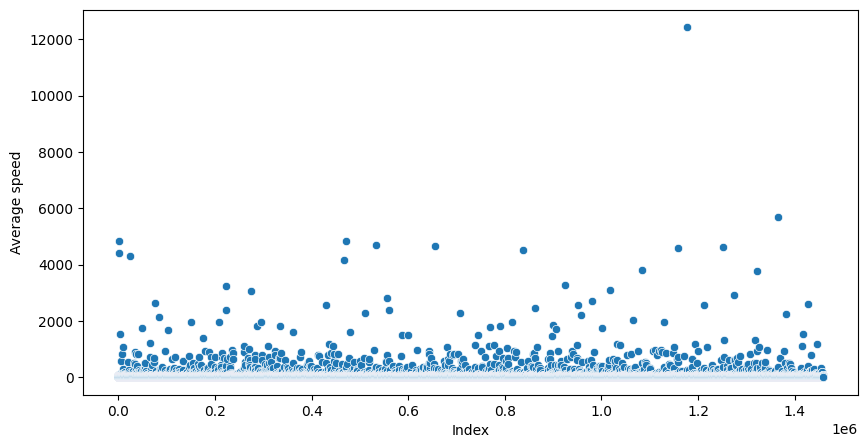

In [ ]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?


❓**Выбросов по признаку длительности: 4**

❓**Выбросов по признаку скорости: 407**


In [ ]:
# лучше удалять из копии, чтобы попортить и не переделывать хороший дата-фрейм
last_df = temp_df.copy()

print(f'Поездок, с длительностью больше 24ч: {(taxi_data["trip_duration"] > 24 * 60 * 60).sum()}')

Поездок, с длительностью больше 24ч: 4


In [ ]:
# Удаляем авантюристов-выбросов
print(f"Размерность до удаления: {last_df.shape}")
last_df = last_df.drop(last_df[last_df["trip_duration"] > 24 * 60 * 60].index)
print(f"Размерность после удаления: {last_df.shape}")

Размерность до удаления: (1458644, 26)
Размерность после удаления: (1458640, 26)


In [ ]:
avg_speed = last_df['total_distance'] / last_df['trip_duration'] * 3.6

last_df["avg_speed"] = avg_speed
print(f"Число выбросов по скорости: {last_df[last_df['avg_speed'] >= 300].shape[0]}")

print(f"Размерность до удаления: {last_df.shape}")

last_df = last_df.drop(last_df[last_df["avg_speed"] >= 300].index)
last_df.dropna(inplace=True)

print(f"Размерность после удаления: {last_df.shape}")


Число выбросов по скорости: 406
Размерность до удаления: (1458640, 27)
Размерность после удаления: (1458233, 27)


In [ ]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458643
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458233 non-null  object        
 1   vendor_id           1458233 non-null  int64         
 2   pickup_datetime     1458233 non-null  datetime64[ns]
 3   dropoff_datetime    1458233 non-null  object        
 4   passenger_count     1458233 non-null  int64         
 5   pickup_longitude    1458233 non-null  float64       
 6   pickup_latitude     1458233 non-null  float64       
 7   dropoff_longitude   1458233 non-null  float64       
 8   dropoff_latitude    1458233 non-null  float64       
 9   store_and_fwd_flag  1458233 non-null  object        
 10  trip_duration       1458233 non-null  int64         
 11  pickup_date         1458233 non-null  object        
 12  pickup_hour         1458233 non-null  int64         
 13  pickup_day_o

**Сохраням результат данного раздела**

In [ ]:
save_result(last_df, '3task')

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


❓**В этом разделе ответы давать буду уже после отображения графиков, считаю, что так нагляднее**❓

### ***Загрузка данных после завершения работы***

In [ ]:
# ЗАГРУЖАЮ ДАТА-СЕТ, ПОЛУЧЕННЫЕ ПОСЛЕ ВЫПОЛНЕНИЯ ВСЕХ
# ПУНКТОВ ИЗ ВТОРОГО РАЗДЕЛА
# ТЕПЕРЬ НЕ НУЖНО ВЫПОЛНЯТЬ ДЕЙСТВИЯ ПОВТОРНО

upload_google()  # подключая библиотеки и монтирую необходимое для работы гугл диска

taxi_data = load_result('3task')  # загружаю данные

taxi_data = convert_object_to_datetime(taxi_data, ['pickup_datetime'])  # перевожу столбец в datetime

# необходимые действия для столбцов, полученных из datetime 
taxi_data = convert_object_to_single_day(taxi_data, 'pickup_datetime', ['pickup_date'])

taxi_data = convert_object_to_single_hour(taxi_data, 'pickup_datetime', ['pickup_hour'])

In [ ]:
taxi_data.info()  # один int32 стал int64, в остальном DataFreim совпадают

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458233 entries, 0 to 1458232
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458233 non-null  object        
 1   vendor_id           1458233 non-null  int64         
 2   pickup_datetime     1458233 non-null  datetime64[ns]
 3   dropoff_datetime    1458233 non-null  object        
 4   passenger_count     1458233 non-null  int64         
 5   pickup_longitude    1458233 non-null  float64       
 6   pickup_latitude     1458233 non-null  float64       
 7   dropoff_longitude   1458233 non-null  float64       
 8   dropoff_latitude    1458233 non-null  float64       
 9   store_and_fwd_flag  1458233 non-null  object        
 10  trip_duration       1458233 non-null  int64         
 11  pickup_date         1458233 non-null  object        
 12  pickup_hour         1458233 non-null  int64         
 13  pickup_day_o

Функция от организатора ниже для добовления нового столбца

In [ ]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

In [ ]:
print(taxi_data['trip_duration_log'][0])

6.1224928095143865


### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

❓**p-value равно 0**

❓**Нет, распределение отлично от нормального**

In [ ]:
k2, p = stats.normaltest(taxi_data['trip_duration_log'])
alpha = 0.05

print(f"p = {p:g}")

if p > alpha:
  print("Нулевая гипотеза не может быть отвергнута")

else:
  print("Нулевая гипотеза может быть отвергнута")


p = 0
Нулевая гипотеза может быть отвергнута


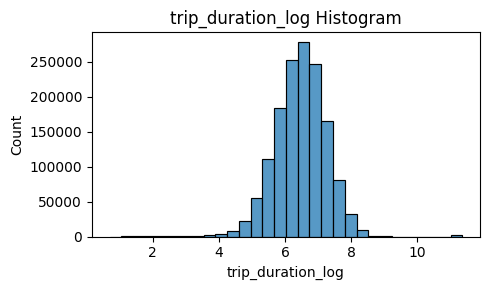

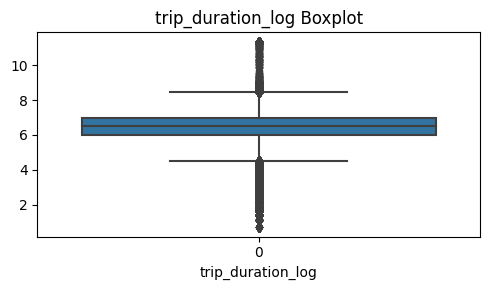

In [ ]:
# Гистограмма
plt.figure(figsize = (5, 3))
plt.title('trip_duration_log Histogram')
sns.histplot(taxi_data['trip_duration_log'], bins=30)
plt.xlabel('trip_duration_log')
plt.ylabel('Count')
plt.show()

# Коробчатая диаграмма
plt.figure(figsize = (5, 3))
plt.title('trip_duration_log Boxplot')
sns.boxplot(taxi_data['trip_duration_log'])
plt.xlabel('trip_duration_log')
plt.show()

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

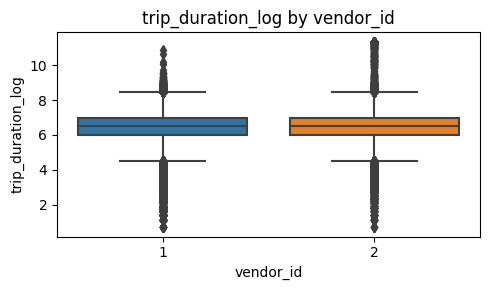

In [ ]:
plt.figure(figsize = (5, 3))
plt.title('trip_duration_log by vendor_id')
sns.boxplot(x='vendor_id', y='trip_duration_log', data=taxi_data)
plt.xlabel('vendor_id')
plt.ylabel('trip_duration_log')
plt.tight_layout()
plt.show()

❓**Видим, что графики почти идентичные, поэтому**

❓*Распределения в группах практически не отличаются, признак vendor_id **не** имеет значения при определении длительности поездки.*

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

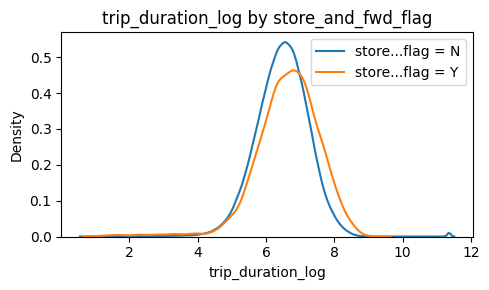

In [ ]:
plt.figure(figsize = (5, 3))
plt.title('trip_duration_log by store_and_fwd_flag')

# График для common_norm = True
sns.kdeplot(
    data=taxi_data[taxi_data['store_and_fwd_flag'] == 'N'],
    x='trip_duration_log',
    label='store...flag = N',
    common_norm=True
)

# График для common_norm = False
sns.kdeplot(
    data=taxi_data[taxi_data['store_and_fwd_flag'] == 'Y'],
    x='trip_duration_log',
    label='store...flag = Y',
    common_norm=False
)

plt.xlabel('trip_duration_log')
plt.ylabel('Density')
plt.tight_layout()
plt.legend()
plt.show()


❓**Видим, что графики при различных флагах различны, поэтому**

*Распределения в группах значительно **отличаются**, признак store_and_fwd_flag имеет значение при определении длительности поездки.*

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

❓ **Время суток: с 0 до 5**

❓ **Пик медианы с с 13:00 по 18:00**

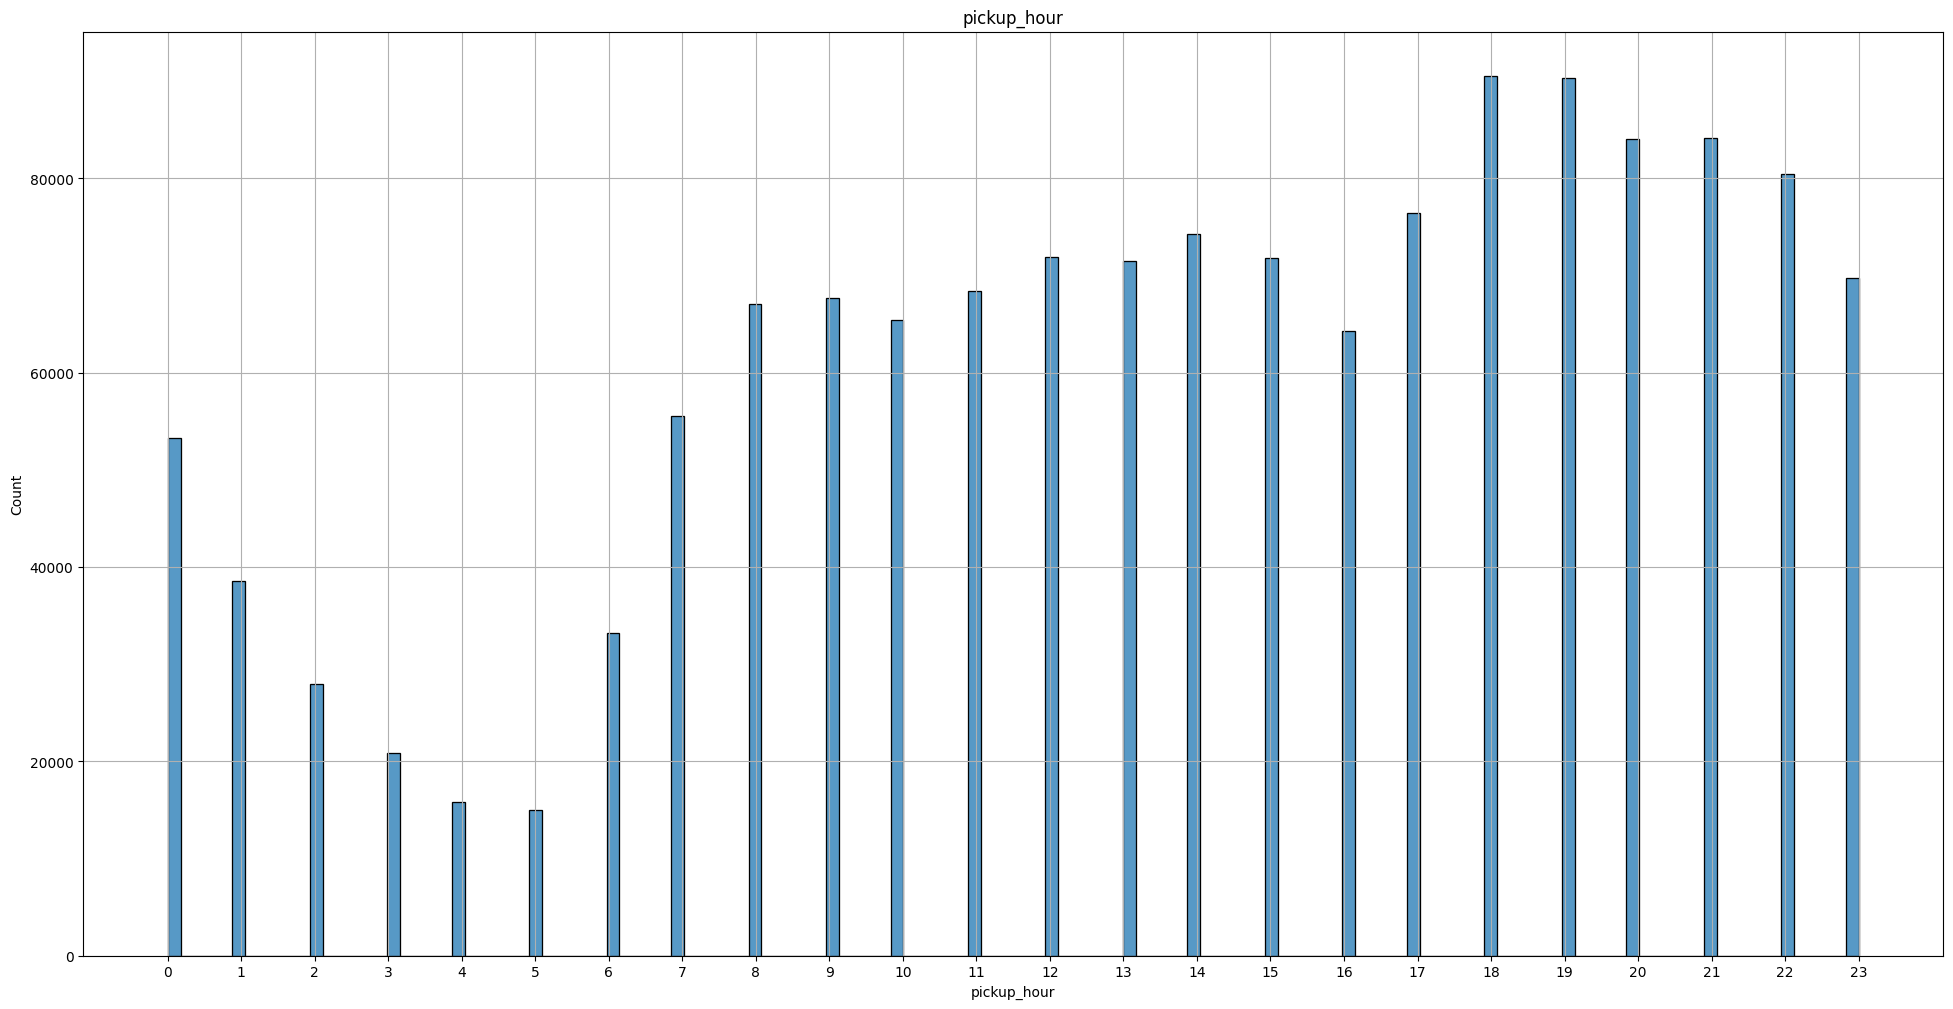

In [ ]:
# пришлось увеличить график, так как 4 и 5 близки, поэтому сделал побольше для наглядности

plt.figure(figsize=(24, 12))
plt.title("pickup_hour")
plt.xticks(range(24))  # часы
plt.grid()

# Построение гистограммы
sns.histplot(taxi_data["pickup_hour"])

plt.show()


**5** хоть и чутка, но ниже 4х (если вопрос про час)

Время суток: с 0 до 5

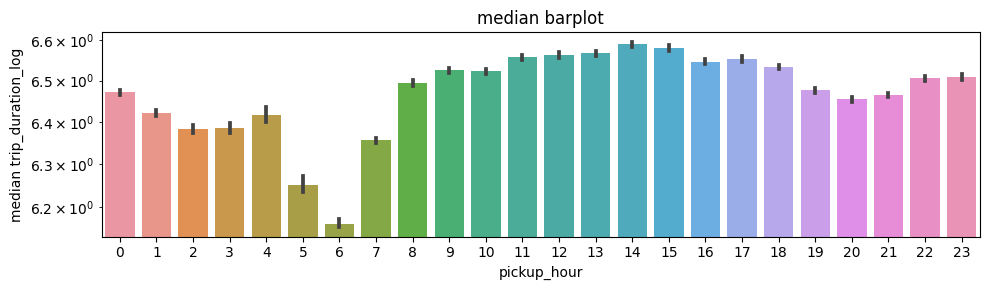

In [ ]:
# для данного пункта лучше бы подошёл lineplot, но мне стало интересно
# какая альтернативу може использовать
plt.figure(figsize = (10, 3))
plt.title("median barplot")
plt.xticks(range(24))
plt.grid()

graf = sns.barplot(
    x=taxi_data["pickup_hour"],
    y=taxi_data["trip_duration_log"],
    estimator=np.median,
)

graf.set_yscale("log")  # логарифмировани шкалы оси Y

plt.xlabel("pickup_hour")
plt.ylabel("median trip_duration_log")

plt.tight_layout()
plt.show()

Пик медианы с с **13:00 по 18:00**

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:

а) В какой день недели совершается больше всего поездок?

б) В какой день недели медианная длительность поездок наименьшая?

❓Больше всего поездок в **Пятницу (4)**

❓Для первого графика, чтобы точно увидеть разницу, нужно увеличить второй параметр в figsize, но в угоду компактности, сделал график меньше

❓Медиана ниже в **Воскресенье (6)**

***МОЙ КОММЕНТАРИЙ!***

0 - понедельник

6 - воскресенье

Я создал этот толбец не с именами дней недели, а с цифрами, так как на платформе и в коллабе были разные нейминги

Я выбрал цифры, так как обычно для обучения модели проще обрабатывать числовые (так говорит этот ваш интернет)

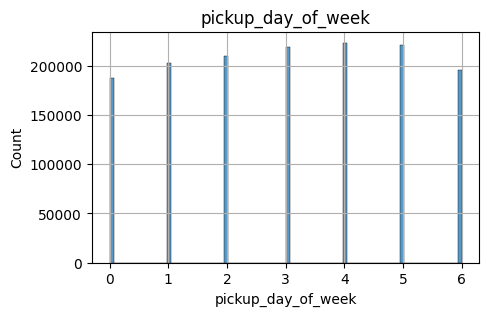

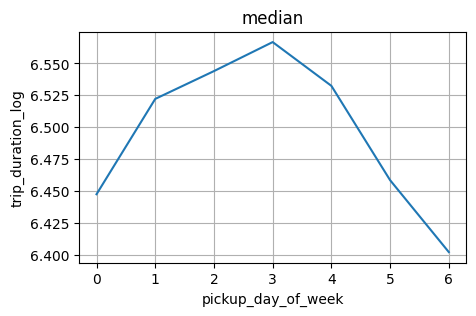

In [ ]:
plt.figure(figsize=(5, 3))
plt.title("pickup_day_of_week")
plt.grid()
sns.histplot(taxi_data["pickup_day_of_week"]);

plt.figure(figsize=(5, 3))
plt.title("median")
plt.grid()
sns.lineplot(taxi_data.groupby("pickup_day_of_week")["trip_duration_log"].agg("median"));

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

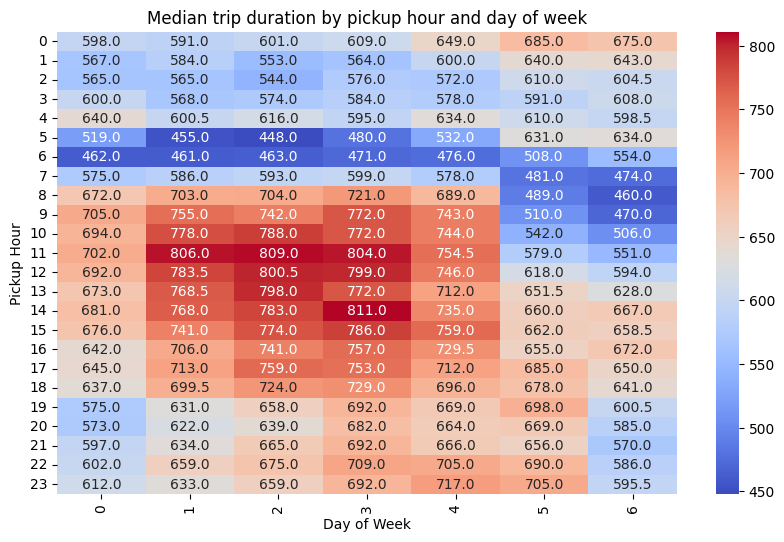

In [ ]:
# Создание сводной таблицы с медианными значениями
pivot_table = taxi_data.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median'
)

# Построение тепловой карты
plt.figure(figsize=(10, 6))
plt.title("Median trip duration by pickup hour and day of week")
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", cbar=True)

plt.xlabel("Day of Week")
plt.ylabel("Pickup Hour")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()


❓A. Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов. <br>
**Да.** Можно заметить по более красному оттенку

❓B. Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня. <br>
**Да.** Пересечение 14 и 3 даёт самый красный оттенок (ну и ещё там число ☺ самое большое)

❓C. Наибольшая медианная длительность поездки наблюдалась в понедельник в 17 часов дня. <br>
*Нет.* Можно понять даже по оттенку. Пересечение 0 и 17 даёт бежево-серый цвет, хотя за минимум отвечает синий цвет.

❓D. Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 4 до 8 часов. <br>
*Нет.* В это время оттенок голубо-синиий - что означет о минимуме. Высокая продолжительность приходится на красный период примерно с 9 до 15

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

<Axes: title={'center': 'pickup_coordinates'}, xlabel='pickup_longitude', ylabel='pickup_latitude'>

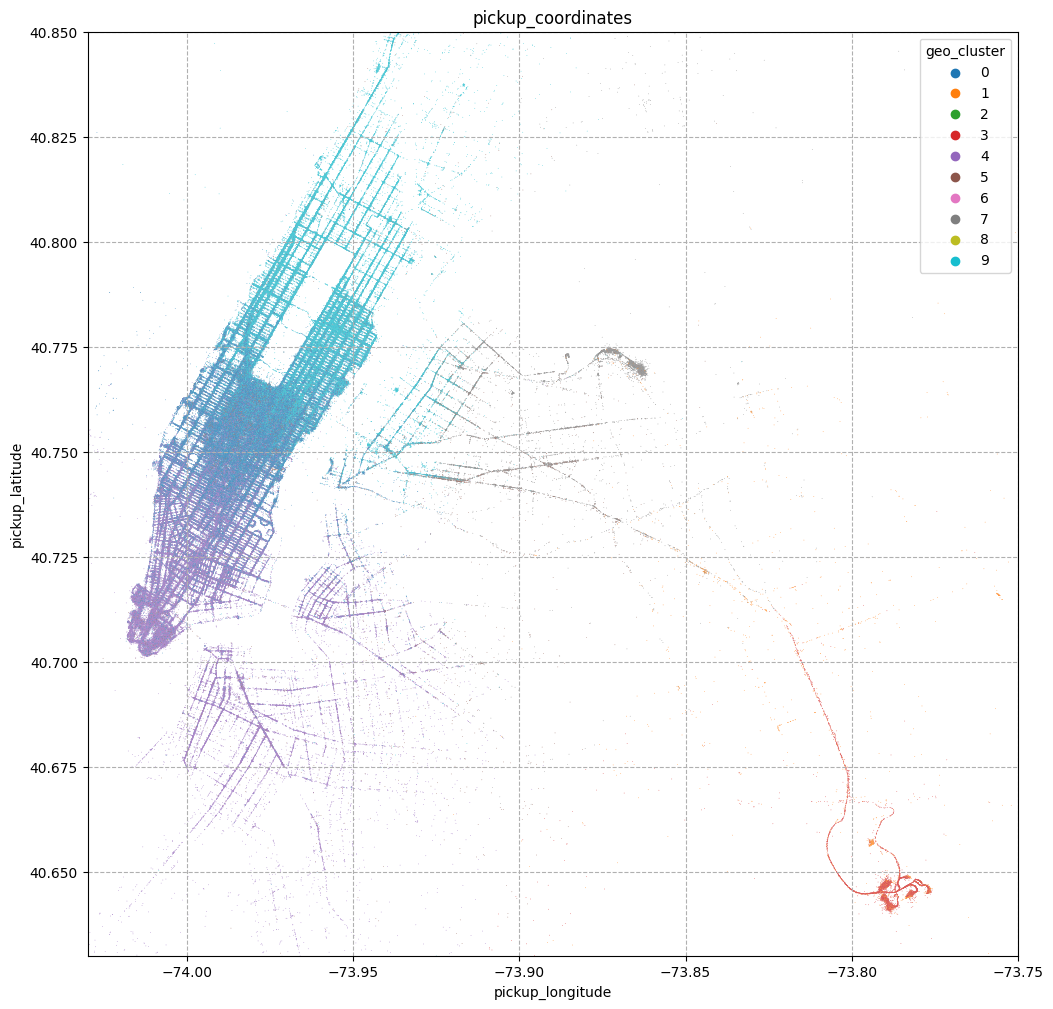

In [ ]:
# График для координат включения счетчика
plt.figure(figsize=(12, 12))
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title("pickup_coordinates")
plt.grid(linestyle = 'dashed')  # пунктир по меткам оси

sns.scatterplot(
    data=taxi_data,
    x = "pickup_longitude",
    y = "pickup_latitude",
    hue = "geo_cluster",
    palette = "tab10",
    s = 0.24  # отвечает за размер точек
)

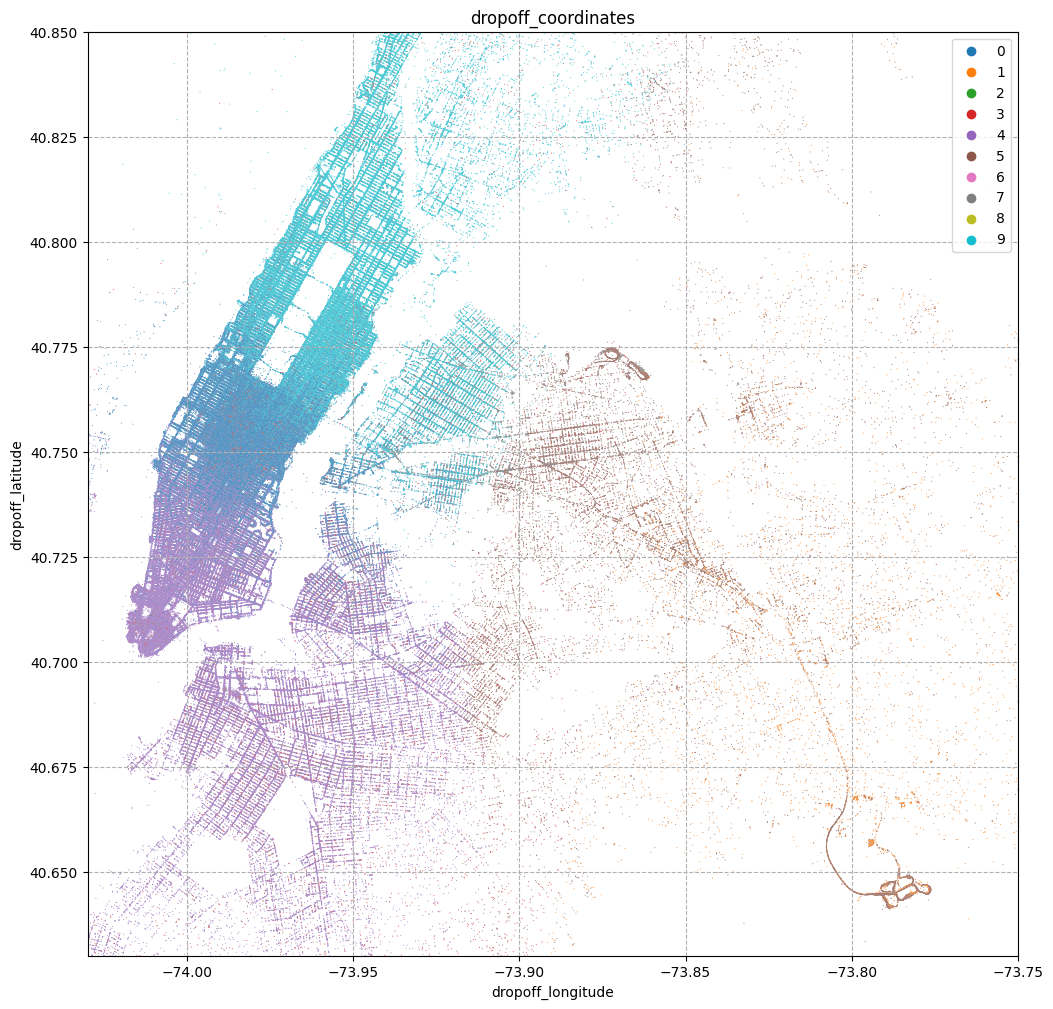

In [ ]:
# График для координат выключения счетчика
plt.figure(figsize = (12, 12))
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title("dropoff_coordinates")
plt.grid(linestyle = 'dashed')  # пунктир по меткам оси

sns.scatterplot(
    data = taxi_data,
    x = "dropoff_longitude",
    y = "dropoff_latitude",
    hue = "geo_cluster",
    palette = "tab10",
    s = 0.48  # отвечает за размер точек
)
plt.legend(loc='upper right')  # чтобы избавиться от варнинг

In [ ]:
# Сохраню на всякий случай результат третий части
save_result(taxi_data, '3_end_task')

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [ ]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 28)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'avg_speed', 'trip_duration_log'],
      dtype='object')


Лишний столбец, *avg_speed*, но так как дальше будем удалять столбцы, пусть ещё чутка поживёт

Для удобства работы сделаем копию исходной таблицы с поездками:

In [ ]:
train_data = taxi_data.copy()
train_data.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,avg_speed,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,15.896176,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,13.646335,6.498282


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…  

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?

❓ **id** (по сути нужен для мёржа)

❓ **ситуация, в которой данные используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.**

❓ **dropoff_datetime** (время мы и ищем, а тут оно почти и есть)

❓ **25**

In [ ]:
drop_columns = ['id', 'dropoff_datetime', 'avg_speed']
train_data = train_data.drop(drop_columns, axis=1)

print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 25)


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [ ]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)

print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае. **← у вас тут опечтка**

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.

❓ а) 0.53

❓ б) 0.006

In [ ]:
# 0 → 1, else 1
train_data["vendor_id"] = train_data["vendor_id"].apply(lambda x: 0 if x == 1 else 1)

# N → 0, else 1
train_data["store_and_fwd_flag"] = train_data["store_and_fwd_flag"].apply(lambda x: 0 if x == "N" else 1)


In [ ]:
unique_vendor_id = train_data["vendor_id"].unique()
unique_store_fwd_flag = train_data["store_and_fwd_flag"].unique()

print(f"Значения в столбце 'vendor_id': {unique_vendor_id}")
print(f"Значения в столбце 'store_and_fwd_flag': {unique_store_fwd_flag}")

print(f"Среднее по столбцу 'vendor_id': {round(train_data['vendor_id'].mean(), 2)}")
print(f"Среднее по столбцу 'store_and_fwd_flag': {round(train_data['store_and_fwd_flag'].mean(), 3)}")

Значения в столбце 'vendor_id': [1 0]
Значения в столбце 'store_and_fwd_flag': [0 1]
Среднее по столбцу 'vendor_id': 0.53
Среднее по столбцу 'store_and_fwd_flag': 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


❓ **Число признаков: 18**

In [ ]:
# Создание объекта OneHotEncoder с указанными параметрами
ohe_encoder = preprocessing.OneHotEncoder(drop='first', handle_unknown='ignore')

columns_to_encode = ["pickup_day_of_week", "geo_cluster", "events"]

# DataFrame для кодирования One-Hot
ohe_df = train_data[columns_to_encode]

# Обучение OneHotEncoder на данных
ohe_encoder.fit(ohe_df)

# Получение названий новых признаков
encoded_column_names = ohe_encoder.get_feature_names_out()

print(f"Число признаков: {len(encoded_column_names)}")

# Преобразование данных с OneHotEncoder
data_onehot = ohe_encoder.transform(ohe_df)

# Преобразование матрицы в массив и создание DataFrame
data_onehot = data_onehot.toarray()
data_onehot = pd.DataFrame(data_onehot, columns=encoded_column_names)

data_onehot.head(1)

Число признаков: 18


,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
checkpoint43 = train_data.copy()

Добавим полученную таблицу с закодированными признаками:

In [ ]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_encode, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии **y_log**. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных

❓ **в принте ячейки**

In [ ]:
f_regression = feature_selection.f_regression

choice_of_fitch = feature_selection.SelectKBest(score_func=f_regression, k=25)

choice_of_fitch_fit = choice_of_fitch.fit(X_train, y_train_log)

final_columns = choice_of_fitch_fit.get_feature_names_out()

print(f"Число отобранных столбцов: {(len(final_columns))}; и их имена: ")
print(final_columns)


Число отобранных столбцов: 25; и их имена: 
['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_1'
 'pickup_day_of_week_2' 'pickup_day_of_week_3' 'pickup_day_of_week_4'
 'pickup_day_of_week_5' 'pickup_day_of_week_6' 'geo_cluster_1'
 'geo_cluster_3' 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


In [ ]:
# Если уж мы выбрали нужные признаки, так давайте избавимся
# от ненужных

X_train = X_train[final_columns]
X_valid = X_valid[final_columns]

### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.

❓ **Cреднее арифметическое: 0.54**

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)

X_train = pd.DataFrame(min_max_scaler.transform(X_train), columns=final_columns)
X_valid = pd.DataFrame(min_max_scaler.transform(X_valid), columns=final_columns)


In [ ]:
print(f"Cреднее арифметическое: {round(np.mean(X_valid.iloc[:, 0]), 2)}")

Cреднее арифметическое: 0.54


**Пришла пора сохраняться**

На всякий случай сохраняю вообще всё, что имеется

In [ ]:
save_result(train_data, '5train_data')
save_result(X_train, '5X_train')
save_result(X_valid, '5X_valid')
save_result(y_train_log, '5y_train_log')
save_result(y_valid_log, '5y_valid_log')

Сохраняю информацию о данных, чтобы после их загрузки обратно в colab можно было проверить, что всё хорошо 

.info() выдаёт слишком много, поэтому загрузил всё в файл и сохранил его

по хорошему это тоже в функцию, но так как это был финал, и много значений на вход было бы, решил оставить так как есть

In [ ]:
# Код, который запишет вывод ячейки в файл
import sys

# Сохраняем настройки вывода
start_stdout = sys.stdout

# Файл для записи
with open('outputw.txt', 'w') as f:
    # Перенаправление вывод в файл
    sys.stdout = f

    print("INFO о train_data")
    train_data.info()

    print("INFO о X_train")
    X_train.info()

    print("INFO о X_valid")
    X_valid.info()

    print("INFO о y_train_alog")
    y_train_log.info()

    print("INFO о y_valid_log")
    y_valid_log.info()


# Восстановление стандартного вывода
sys.stdout = start_stdout


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

### ***Загрузка данных после завершения работы***

In [ ]:
# ЗАГРУЖАЮ ДАТА-СЕТ, ПОЛУЧЕННЫЕ ПОСЛЕ ВЫПОЛНЕНИЯ ВСЕХ
# ПУНКТОВ ИЗ ЧЕТВЁРТОГО РАЗДЕЛА
# НАМ НУЖЕН НЕ ВЕСЬ СЕТ, А ТОЛЬКО РАЗБИВКИ
# в этот раз дату и время обрабатывать не нужну 

upload_google()  # подключая библиотеки и монтирую необходимое для работы гугл диска

X_train = load_result('5X_train')
X_valid = load_result('5X_valid')

y_train_log = pd.read_csv('drive/My Drive/5y_train_log.csv', usecols=['trip_duration_log'], squeeze=True)
y_valid_log = pd.read_csv('drive/My Drive/5y_valid_log.csv', usecols=['trip_duration_log'], squeeze=True)

In [4]:
# проверим, что y_train_log и y_valid_log считались нормально
# мы загружаем из как pandas.core.series.Series
print(y_train_log.shape, y_valid_log.shape)

(977016,) (481217,)


*Посмотрим информацию о загруженных данных, и сравним её с той, что была до выгрузги в .csv файлы*

In [6]:
# Код, который запишет вывод ячейки в файл
import sys

# Сохраняем настройки вывода
start_stdout = sys.stdout

# Файл для записи
with open('output_new.txt', 'w') as f:
    # Перенаправление вывод в файл
    sys.stdout = f

    print("INFO о X_train")
    X_train.info()

    print("INFO о X_valid")
    X_valid.info()

    print("INFO о y_train_alog")
    y_train_log.info()

    print("INFO о y_valid_log")
    y_valid_log.info()


# Восстановление стандартного вывода
sys.stdout = start_stdout


*Чтобы понять, что данные после пункта сохранения и загрузки одинаковые, сравним их информацию*

*/output_delete_train_data.txt это вчерашний output.txt, но без train_data*

In [7]:
# Чтение файлов
file1 = '/content/output_delete_train_data.txt'
file2 = '/content/output_new.txt'

# Сравнение строк и вывод различающихся строк блоками
diff_blocks = []
current_block = []
with open(file1, 'r') as f1, open(file2, 'r') as f2:
    for line1, line2 in zip(f1, f2):
        if line1 != line2:
            current_block.extend([line1, line2])
        elif current_block:
            diff_blocks.append(current_block)
            current_block = []
    if current_block:
        diff_blocks.append(current_block)

# Вывод различающихся блоков строк
if diff_blocks:
    print("Различающиеся блоки строк:")
    for block in diff_blocks:
        print('--- Начало блока ---')
        print(''.join(block), end="")
        print('--- Конец блока ---\n\n')
else:
    print("Файлы идентичны")


Различающиеся блоки строк:
--- Начало блока ---
INFO о y_train_log
INFO о y_train_alog
--- Конец блока ---


--- Начало блока ---
Int64Index: 977016 entries, 293850 to 121958
RangeIndex: 977016 entries, 0 to 977015
--- Конец блока ---


--- Начало блока ---
memory usage: 14.9 MB
memory usage: 7.5 MB
--- Конец блока ---


--- Начало блока ---
Int64Index: 481217 entries, 452652 to 1108352
RangeIndex: 481217 entries, 0 to 481216
--- Конец блока ---


--- Начало блока ---
memory usage: 7.3 MB
memory usage: 3.7 MB
--- Конец блока ---




Как видим, поменялся только диапазон значений индекса, но **кол-во строк** и их **формат** **остались теме же**

(memory usage это показатель внутренний, его не рассматриваем)  

***НАЧАЛО ЗАДАНИЯ***

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

❓**RMSLE train: 0.54**
**RMSLE valid: 0.54**


In [8]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train_log)

y_train_predict = linear_reg.predict(X_train)
print(f"y_train_predict: {y_train_predict}")

y_valid_predict = linear_reg.predict(X_valid)
print(f"y_valid_predict:  {y_valid_predict}")


y_train_predict: [5.95568658 6.16268592 6.0462479  ... 6.3518388  5.86173394 6.13939255]
y_valid_predict:  [5.89589845 5.83006925 5.51847212 ... 6.45654488 6.36247057 5.9961741 ]


### ***Функиция для рассёта RMSLE***

In [9]:
# функиция для рассёта RMSLE
def calculate_rmsle(y_true, y_pred):
    return round(metrics.mean_squared_error(y_true, y_pred, squared=False), 2)

In [10]:
# в другой ячейки, так как функцию будем вызывать ещё
print("RMSLE train:", calculate_rmsle(y_train_log, y_train_predict))
print("RMSLE valid:", calculate_rmsle(y_valid_log, y_valid_predict))


RMSLE train: 0.54
RMSLE valid: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?

❓**a) RMSLE train_poly: 0.47 RMSLE train: 0.7**

❓**б) да**

In [11]:
poly_features = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_valid_poly = poly_features.fit_transform(X_valid)

# обучение
linear_reg_poly = linear_model.LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train_log)


y_train_poly_predict = linear_reg_poly.predict(X_train_poly)
print(f"y_train_poly_predict: {y_train_poly_predict}")
y_valid_poly_predict = linear_reg_poly.predict(X_valid_poly)
print(f"y_valid_poly_predict: {y_valid_poly_predict}")


print("RMSLE train_poly:", calculate_rmsle(y_train_log, y_train_poly_predict))
print("RMSLE train:", calculate_rmsle(y_valid_log, y_valid_poly_predict))


y_train_poly_predict: [5.71374486 6.16332982 6.09527562 ... 6.02062962 5.77386738 6.28747533]
y_valid_poly_predict: [5.80688451 5.35388158 4.69726536 ... 6.21855481 6.60430192 6.1030576 ]
RMSLE train_poly: 0.47
RMSLE train: 0.7


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

❓**RMSLE train_ridge: 0.48 RMSLE valid_ridge: 0.48**


In [12]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train_poly, y_train_log)


y_train_ridge_predict = ridge.predict(X_train_poly)
print(f"y_train_ridge_predict: {y_train_ridge_predict}")
y_valid_ridge_predict = ridge.predict(X_valid_poly)
print(f"y_valid_ridge_predict: {y_valid_ridge_predict}")


print("RMSLE train_ridge:", calculate_rmsle(y_train_log, y_train_ridge_predict))
print("RMSLE valid_ridge:", calculate_rmsle(y_valid_log, y_valid_ridge_predict))


y_train_ridge_predict: [5.71825642 6.22552776 6.11983477 ... 6.1526633  5.7245661  6.23726213]
y_valid_ridge_predict: [5.80850355 5.40719628 4.79239444 ... 6.21681268 6.53716055 6.07281515]
RMSLE train_ridge: 0.48
RMSLE valid_ridge: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?

❓**а) RMSLE train_detrreg: 0.0 RMSLE valid_detrreg: 0.57**

❓**б) да**


In [13]:
detrreg = tree.DecisionTreeRegressor()
detrreg.fit(X_train, y_train_log)


y_train_detrreg_predict = detrreg.predict(X_train)
print(f"y_train_detrreg_predict: {y_train_detrreg_predict}")
y_valid_detrreg_predict = detrreg.predict(X_valid)
print(f"y_valid_ridge_predict: {y_valid_detrreg_predict}")


print()
print("RMSLE train_detrreg:", calculate_rmsle(y_train_log, y_train_detrreg_predict))
print("RMSLE valid_detrreg:", calculate_rmsle(y_valid_log, y_valid_detrreg_predict))


y_train_detrreg_predict: [6.2441669  6.03308622 5.56068163 ... 5.97635091 5.12989871 6.3851944 ]
y_valid_ridge_predict: [5.91350301 5.81711116 5.92157842 ... 6.43935037 6.56667243 6.44254017]

RMSLE train_detrreg: 0.0
RMSLE valid_detrreg: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.

❓**а) Оптимальная глубина дерева решений: 12**

❓**б) RMSLE train_detrreg: 0.41 RMSLE valid_detrreg: 0.43**

In [14]:
# ф-ци для проверки всех деревьев
def rmsle_calculate_lists(max_depths,
                          X_train, y_train_log, X_valid, y_valid_log, 
                          y_train_detrreg_predict, y_valid_detrreg_predict):
  
    rmsle_train_list = []
    rmsle_valid_list = []

    for max_depth in max_depths:
      detrreg = tree.DecisionTreeRegressor(max_depth=max_depth)
      detrreg.fit(X_train, y_train_log)

      y_train_detrreg_predict = detrreg.predict(X_train)
      y_valid_detrreg_predict = detrreg.predict(X_valid)

      rmsle_detrreg_train = metrics.mean_squared_error(
          y_train_log,
          y_train_detrreg_predict,
          squared=False
      )

      rmsle_detrreg_valid = metrics.mean_squared_error(
          y_valid_log,
          y_valid_detrreg_predict,
          squared=False
      )

      rmsle_train_list.append(rmsle_detrreg_train)
      rmsle_valid_list.append(rmsle_detrreg_valid)

    return rmsle_train_list, rmsle_valid_list

In [15]:
max_depths = range(7, 20)

rmsle_train_list, rmsle_valid_list = rmsle_calculate_lists(
    max_depths,
    X_train, y_train_log, X_valid, y_valid_log,
    y_train_detrreg_predict, y_valid_detrreg_predict
    )


In [16]:
# проверив, что всё нормально
print(rmsle_train_list[0:5])
print(rmsle_valid_list[0:5])

[0.44482226301161487, 0.4370013020144347, 0.4299042241204146, 0.42241353172548707, 0.41457242069973166]
[0.4471739545494091, 0.4407666375437593, 0.43562681860498137, 0.43137939804581255, 0.4300311381509272]


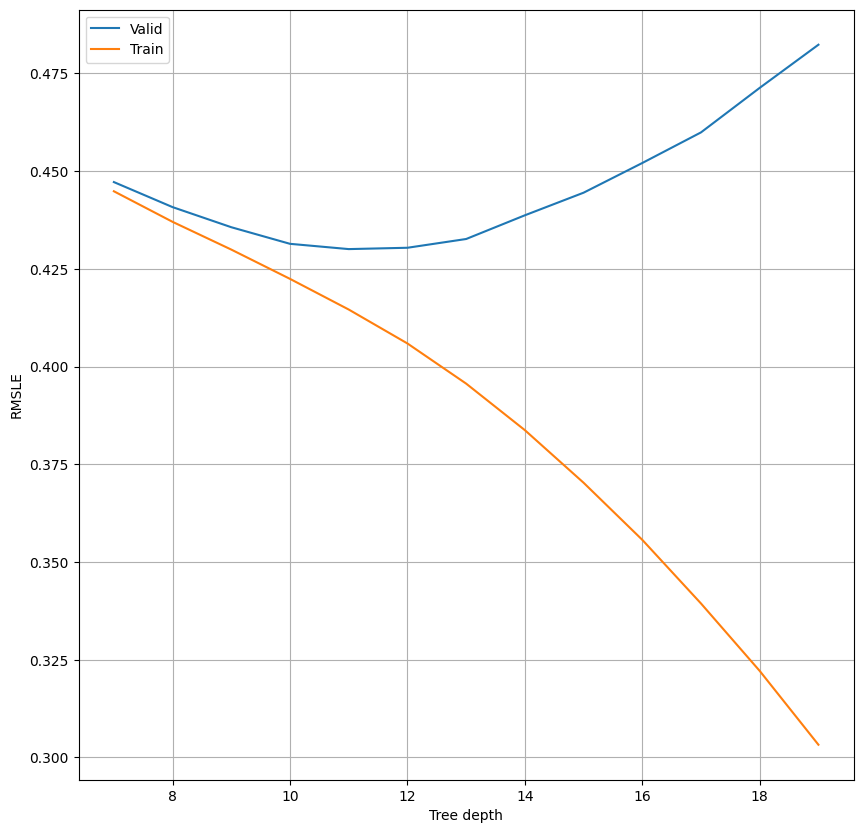

In [17]:
# строим график
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("Tree depth")
ax.set_ylabel("RMSLE")
ax.grid()

plt.plot(max_depths, rmsle_valid_list, label="Valid")
plt.plot(max_depths, rmsle_train_list, label="Train")


plt.legend()
plt.show()


*На этом графике кажется, что 11 - оптимальная глубина*

*Но сначала тестил всё в отдельном колабе, и там 12 - прям самое то, поэтому*

Обучаем на оптимальной глубене в **12** 

In [18]:
detrreg = tree.DecisionTreeRegressor(max_depth=12)
detrreg.fit(X_train, y_train_log)


y_train_detrreg_predict = detrreg.predict(X_train)
y_valid_detrreg_predict = detrreg.predict(X_valid)


print("RMSLE train_detrreg:", calculate_rmsle(y_train_log, y_train_detrreg_predict))
print("RMSLE valid_detrreg:", calculate_rmsle(y_valid_log, y_valid_detrreg_predict))

RMSLE train_detrreg: 0.41
RMSLE valid_detrreg: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

❓**RMSLE train_detrreg: 0.4 RMSLE valid_detrreg: 0.41**


In [19]:
RF_reg = ensemble.RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    verbose=True,
)
RF_reg.fit(X_train, y_train_log)


y_train_RF_reg_predict = RF_reg.predict(X_train)
y_valid_RF_reg_predict = RF_reg.predict(X_valid)


print("RMSLE train_detrreg:", calculate_rmsle(y_train_log, y_train_RF_reg_predict))
print("RMSLE valid_detrreg:", calculate_rmsle(y_valid_log, y_valid_RF_reg_predict))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 39.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   30.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSLE train_detrreg: 0.4
RMSLE valid_detrreg: 0.41


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.9s finished


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [20]:
gradbost = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42,
    verbose=True,
)
gradbost.fit(X_train, y_train_log)


y_train_gradbost_predict = gradbost.predict(X_train)
y_valid_gradbost_predict = gradbost.predict(X_valid)


print("RMSLE train_gradbost:", calculate_rmsle(y_train_log, y_train_gradbost_predict))
print("RMSLE valid_gradbost:", calculate_rmsle(y_valid_log, y_valid_gradbost_predict))

      Iter       Train Loss   Remaining Time 
         1           0.3110           22.14m
         2           0.2247           18.83m
         3           0.1987           17.96m
         4           0.1876           16.87m
         5           0.1823           16.63m
         6           0.1783           16.42m
         7           0.1756           15.90m
         8           0.1730           15.76m
         9           0.1709           15.54m
        10           0.1696           15.32m
        20           0.1577           13.46m
        30           0.1538           11.61m
        40           0.1502            9.91m
        50           0.1480            8.26m
        60           0.1451            6.58m
        70           0.1431            4.90m
        80           0.1410            3.41m
        90           0.1393            1.74m
       100           0.1383            0.00s
RMSLE train_gradbost: 0.37
RMSLE valid_gradbost: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* ❓**Градиентный бустинг над деревьями решений**

**лучше на 0.02**

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.

❓**total_distance, total_travel_time, pickup_hour**


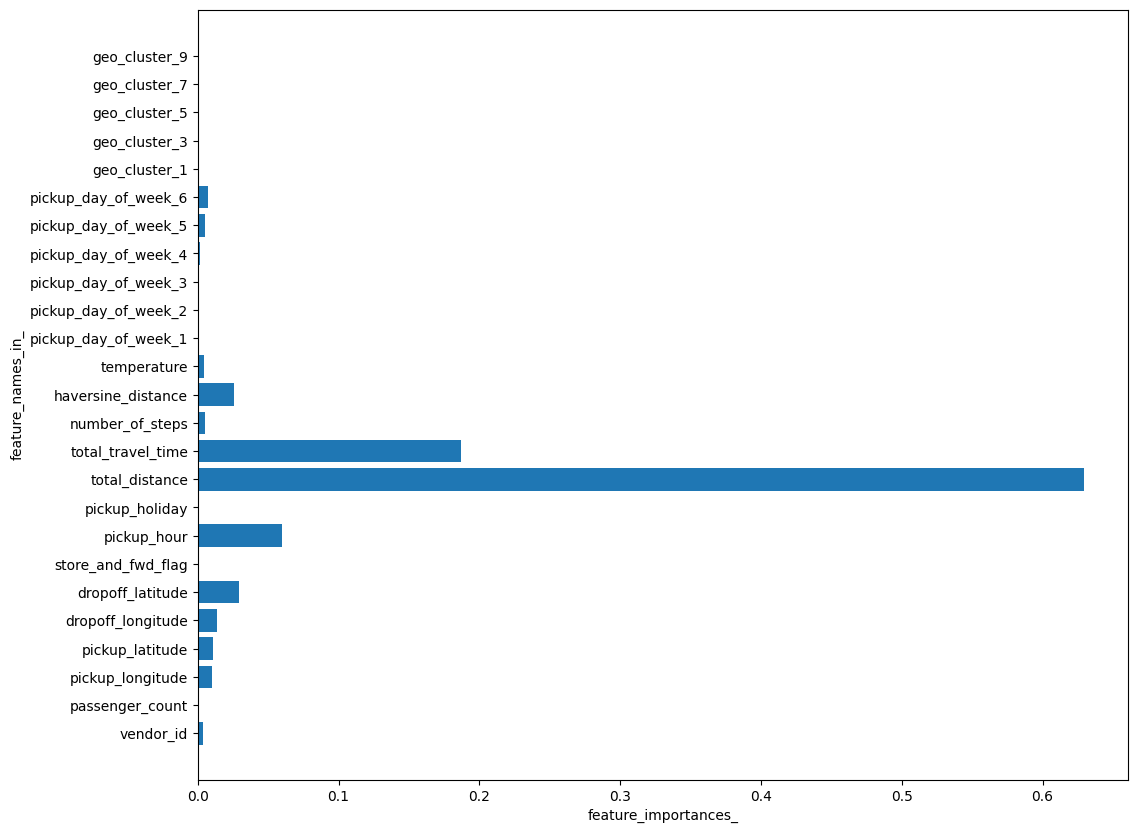

In [22]:
plt.figure(figsize=(12, 10))

plt.ylabel("feature_names_in_")
plt.xlabel("feature_importances_")

plt.barh(
    gradbost.feature_names_in_,
    gradbost.feature_importances_
)
plt.show()


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


❓**MeAE в минутах: 1.8**

In [30]:
y_true = np.exp(y_train_log) - 1
y_pred = np.exp(y_train_gradbost_predict) - 1

MeAE = round(metrics.median_absolute_error(y_true, y_pred) / 60, 1)
print(f"MeAE в минутах: {MeAE}")

MeAE в минутах: 1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [29]:
# далее не понадобится, но покажу ещё раз как загружаю))
test_data = load_result('final/Project5_test_data')
osrm_data_test = load_result('final/Project5_osrm_data_test')

test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


**ТАК КАК ДЕЛАЛ ЗАДАНИЕ ПО ЧАСТЯМ, СОХРАНЯЯ И ЗАГРУЖАЯ ДАННЫЕ**

**И ИЗ ЖЕЛАНИЯ НЕ МУЧАТСЯ С ПЕРЕПОЛНЕНИМ РЕСУРСОВ**

**ПОЛУЧИЛОСЬ ТАК, ЧТО БОЛЬШЕНСТВО ФУНКЦИЙ  И ПЕРЕМЕННЫХ ОСТАЛИСЬ ДО ПУНКТА 5**

**И ТАК ЖЕ, ИЗ-ЗА ТОГО, ЧТО ПРОСИЛИ НЕ ПЛОДИТЬ ЯЧЕКИ, ЧТО-ТО ОСТАЛОСЬ СЛИТО В ЕДИНЫЙ КОМ**

**ПОЭТОМУ ЯЧЕЙКУ НИЖЕ ВЫПОЛНИЛ В ОТДЕЛЬНОМ КОЛЛАБЕ (В НЁМ ТЕСТИЛ И 5ЫЙ И 6ОЙ ПУНКТЫ ПОЛНОСТЬЮ, ТАК ЧТО В НЕГО ПЕРНЁМ ВСЁ НЕОБХОДИМОЕ, ЗАПУСТИЛ, А СЮДА УЖЕ ЗАГРУЖУ ТОЛЬКО ОБРАБОТАННЫЙ DataFrame test_data**

**НИЖЕ ПРИВЁЛ ПОДПРАВЛЕНЫЙ ДЛЯ МОЕГО КОЛЛАБА КОД, ПОД СВОИ ВЫЗОВЫ ФУНКЦИЙ (ИНОГДА, ИЗ ЖЕЛАНИЕ СДЕЛАТЬ БОЛЕЕ ВАРИАТИВНО, ПОЛУЧИЛОСЬ, ЧТО НУЖНО УКАЗЫВАТЬ ДОП. ИНФОРМАЦИЮ)**

**ПЕРЕМЕННЫЕ В МОЁМ КОЛЛАБЕ И В КОДЕ НИЖЕ, ТАК КАК В ОТДЕЛЬНОМ КОЛЛАБЕ МЕНЯЛ ИХ ПОД ВАШ МАНЕР**


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test, selected_columns)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, coords, "geo_cluster", kmeans)

columns = [
    "temperature",
    "visibility",
    "wind speed",
    "precip",
    "events",
    "date",
    "hour"
]

left_col_mrg = ["pickup_date", "pickup_hour"]
right_col_mrg = ["date", "hour"]

test_data = add_weather_features(test_data, weather_data, columns, left_col_mrg, right_col_mrg)

test_data.drop(["date", "hour"], axis=1, inplace=True)

test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

**ЗАГРУЖАЕМ ПОЛУЧЕННОЕ**

In [ ]:
test_data = load_result('test_data_colab')
X_test = load_result('X_test_colab')

X_test_scaled = np.load('drive/My Drive/X_test_scaled_colab.npy')

In [36]:
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


In [37]:
test_data.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,...,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,id3004672,0,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2016-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,id3505355,0,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2016-06-30,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,id1217141,0,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,2016-06-30,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,id2150126,1,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,2016-06-30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,id1598245,0,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,2016-06-30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [41]:
X_test_end = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

y_test_predict_end = gradbost.predict(X_test_end)

y_test_predict = np.exp(y_test_predict_end) - 1

Выгрузка конечного результата

In [44]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [45]:
#!pip install xgboost

После чего модуль можно импортировать:

In [46]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [47]:
f_regression = feature_selection.f_regression
choice_of_fitch = feature_selection.SelectKBest(score_func=f_regression, k=25)
choice_of_fitch_fit = choice_of_fitch.fit(X_train, y_train_log)
best_features = choice_of_fitch_fit.get_feature_names_out()

In [48]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_log, feature_names=best_features)

dvalid = xgb.DMatrix(X_valid, label=y_valid_log, feature_names=best_features)

dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [49]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42222	valid-rmse:5.42195
[10]	train-rmse:1.93570	valid-rmse:1.93568
[20]	train-rmse:0.78554	valid-rmse:0.78636
[30]	train-rmse:0.47951	valid-rmse:0.48155
[40]	train-rmse:0.42185	valid-rmse:0.42460
[50]	train-rmse:0.40989	valid-rmse:0.41310
[60]	train-rmse:0.40505	valid-rmse:0.40877
[70]	train-rmse:0.40116	valid-rmse:0.40524
[80]	train-rmse:0.39927	valid-rmse:0.40366
[90]	train-rmse:0.39777	valid-rmse:0.40257
[100]	train-rmse:0.39563	valid-rmse:0.40071
[110]	train-rmse:0.39439	valid-rmse:0.39970
[120]	train-rmse:0.39358	valid-rmse:0.39911
[130]	train-rmse:0.39259	valid-rmse:0.39838
[140]	train-rmse:0.39160	valid-rmse:0.39779
[150]	train-rmse:0.39048	valid-rmse:0.39699
[160]	train-rmse:0.38983	valid-rmse:0.39661
[170]	train-rmse:0.38900	valid-rmse:0.39602
[180]	train-rmse:0.38819	valid-rmse:0.39555
[190]	train-rmse:0.38706	valid-rmse:0.39485
[200]	train-rmse:0.38625	valid-rmse:0.39430
[210]	train-rmse:0.38552	valid-rmse:0.39397
[220]	train-rmse:0.38475	valid-rmse:0.39360

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [50]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39167


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

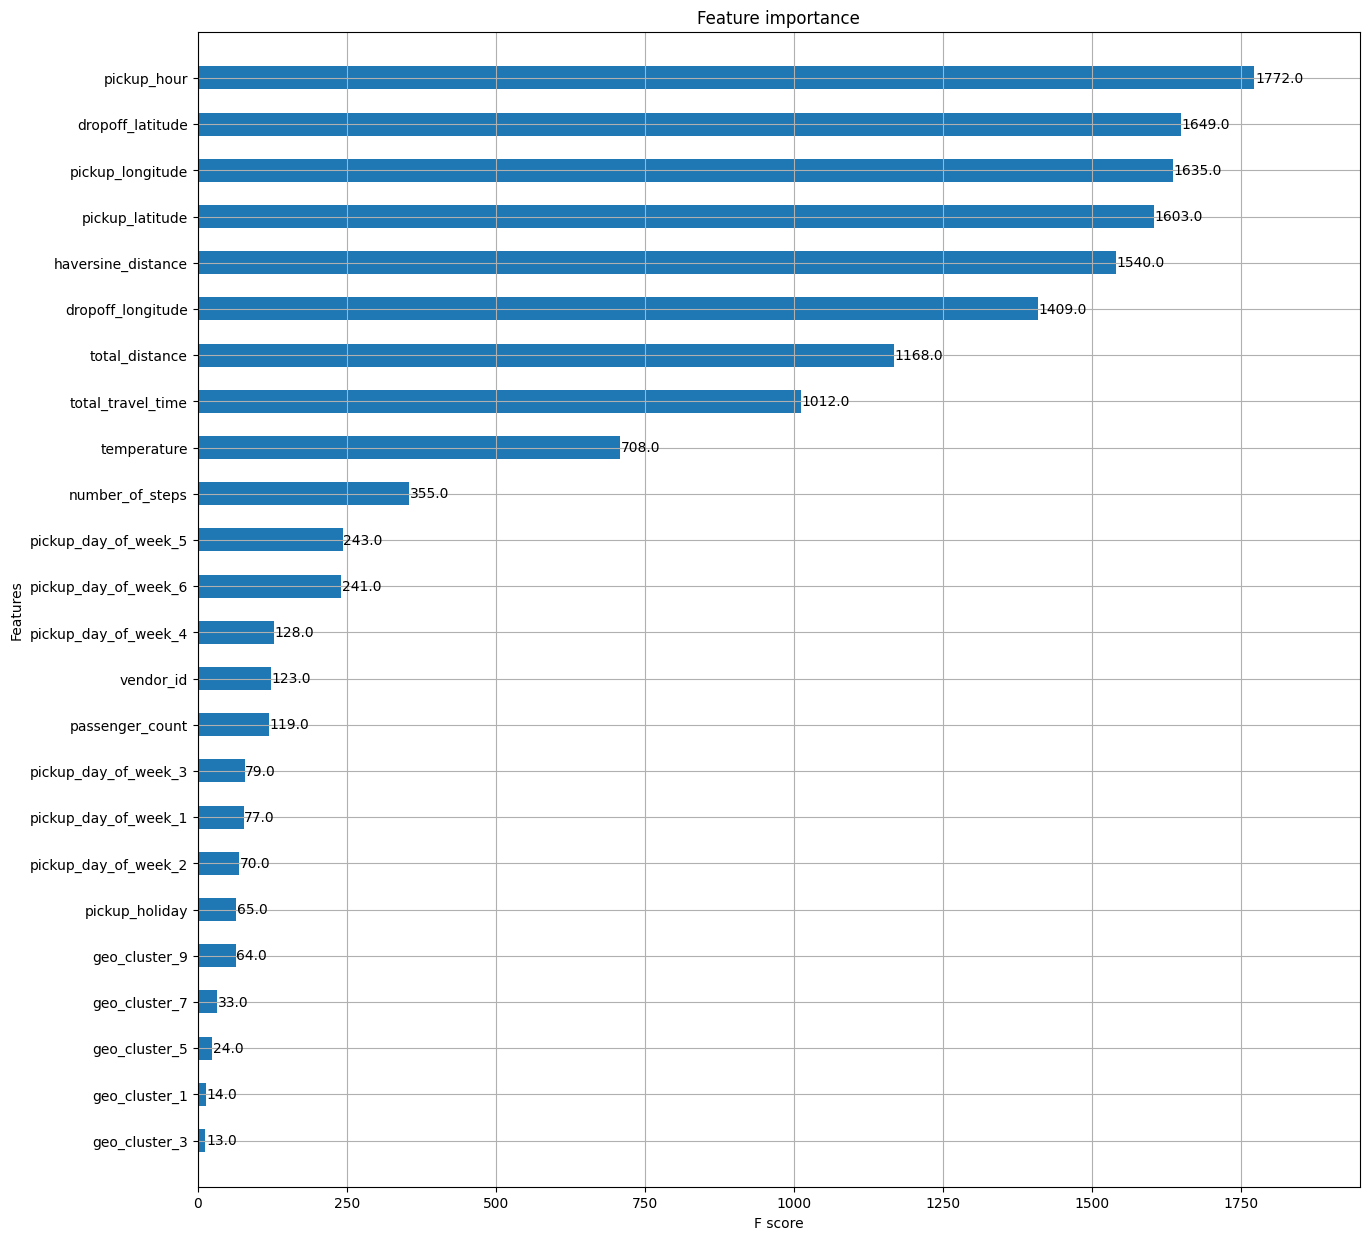

In [51]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

In [52]:
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('submission_gb_xgboost.csv', index=False)